Notebook to make parameter vs time plot

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import pylab as plt
import numpy as np

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def set_size(width=513.11743, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5 ** 0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

<IPython.core.display.Javascript object>

Load up the data

In [4]:
all_bursts_bary = pd.read_csv("../data/all_bursts_bary.csv")
all_bursts_bary = all_bursts_bary.drop("Unnamed: 0", axis=1)

<IPython.core.display.Javascript object>

In [5]:
all_bursts_bary.columns

Index(['$\mu_f$ (MHz)', 'upper error$\mu_f$ (MHz)', 'lower error$\mu_f$ (MHz)',
       '$\sigma_f$ (MHz)', 'upper error$\sigma_f$ (MHz)',
       'lower error$\sigma_f$ (MHz)', '$S$ (Jy ms)', 'upper error$S$ (Jy ms)',
       'lower error$S$ (Jy ms)', '$\mu_t$ (ms)', 'upper error$\mu_t$ (ms)',
       'lower error$\mu_t$ (ms)', '$\sigma_t$ (ms)',
       'upper error$\sigma_t$ (ms)', 'lower error$\sigma_t$ (ms)',
       '$\tau$ (ms)', 'upper error$\tau$ (ms)', 'lower error$\tau$ (ms)',
       'DM (pc cm$^{-3}$)', 'upper errorDM (pc cm$^{-3}$)',
       'lower errorDM (pc cm$^{-3}$)', 'cand_id', 'comp_num', 'fit_method',
       'use_fluence', 'bidx'],
      dtype='object')

<IPython.core.display.Javascript object>

In [6]:
all_bursts_bary = all_bursts_bary[all_bursts_bary['fit_method'] == 'mcmc']
all_bursts_bary = all_bursts_bary[all_bursts_bary['use_fluence'] == True]

<IPython.core.display.Javascript object>

In [7]:
day1 = all_bursts_bary[np.round(all_bursts_bary['$\mu_t$ (ms)'], 0) == 57644]
day2 = all_bursts_bary[np.round(all_bursts_bary['$\mu_t$ (ms)'], 0) == 57645]

<IPython.core.display.Javascript object>

In [8]:
days = [day1, day2]

<IPython.core.display.Javascript object>

In [9]:
param_list = ['$\\mu_f$ (MHz)',
 '$\\sigma_f$ (MHz)',
 '$S$ (Jy ms)',
 '$\\sigma_t$ (ms)',
 '$\\tau$ (ms)',
 'DM (pc cm$^{-3}$)']

<IPython.core.display.Javascript object>

In [10]:
# set parameter ranges 
param_dict = {}
param_dict['$\\mu_f$ (MHz)'] = [1200, 1900]
param_dict['$\\sigma_f$ (MHz)'] = [0, 300]
param_dict['$S$ (Jy ms)'] = [0.05, 1.1]
param_dict['$\\sigma_t$ (ms)'] = [10**-1, 10**1]
param_dict['$\\tau$ (ms)'] = [0, 3]
param_dict['DM (pc cm$^{-3}$)'] = [560, 575]

<IPython.core.display.Javascript object>

Plot! 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


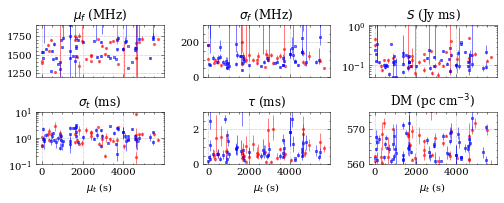

<IPython.core.display.Javascript object>

In [12]:
x_key = "$\mu_t$ (ms)"
colors = ["red", "blue"]
markers = ["o", "s"]

with plt.style.context(["science", "grid"]):
    fig, axes = plt.subplots(
        2, 3, sharex=True, sharey=False, figsize=set_size(subplots=(2, 3))
    )
    for i in range(2):
        day = days[i].copy()
        day["$\mu_t$ (ms)"] -= np.min(day["$\mu_t$ (ms)"])
        day["lower error$\mu_t$ (ms)"] *= 24 * 60 * 60
        day["upper error$\mu_t$ (ms)"] *= 24 * 60 * 60
        day["$\mu_t$ (ms)"] *= 24 * 60 * 60
        for j, p in enumerate(param_list):
            ax = axes[j // 3, j % 3]
            y_key = p
            
            # reading errors 
            x_errors = np.array(
                [
                    np.array(day["lower error" + x_key]),
                    np.array(day["upper error" + x_key]),
                ]
            )

            y_errors = np.array(
                [
                    np.array(day["lower error" + y_key]),
                    np.array(day["upper error" + y_key]),
                ]
            )
            
            # plotting errors 
            ax.errorbar(
                day[x_key],
                day[y_key],
                xerr=x_errors,
                yerr=y_errors,
                ls="none",
                color=colors[i],
                alpha=0.5,
            )
            
            # plotting medians 
            ax.scatter(
                day[x_key],
                day[y_key],
                color=colors[i],
                marker=markers[i],
                alpha=0.5,
                s=5,
            )
            ax.set_title(p)
            if "$S$" in p or "sigma_t" in p:
                ax.set_yscale("log")
            if j // 3 == 1:
                ax.set_xlabel(r"$\mu_t$ (s)")
            ax.set_ylim(param_dict[p][0], param_dict[p][1])
        plt.tight_layout()
    plt.savefig("param_vs_time.pdf", bbox_inches="tight")